In [9]:
# Cargar librerías necesarias
library(ggplot2)
library(tidyr)
library(ggpubr)
library(reshape2)
library(FactoMineR)
library(factoextra)
library(MASS)

In [10]:
# Leer el dataset
data <- read.csv("../../results/processed_dataset/1_processed_input_dataset.csv")
data$MSPH <- ifelse(data$MSPH == 0, "Negative", "Positive")

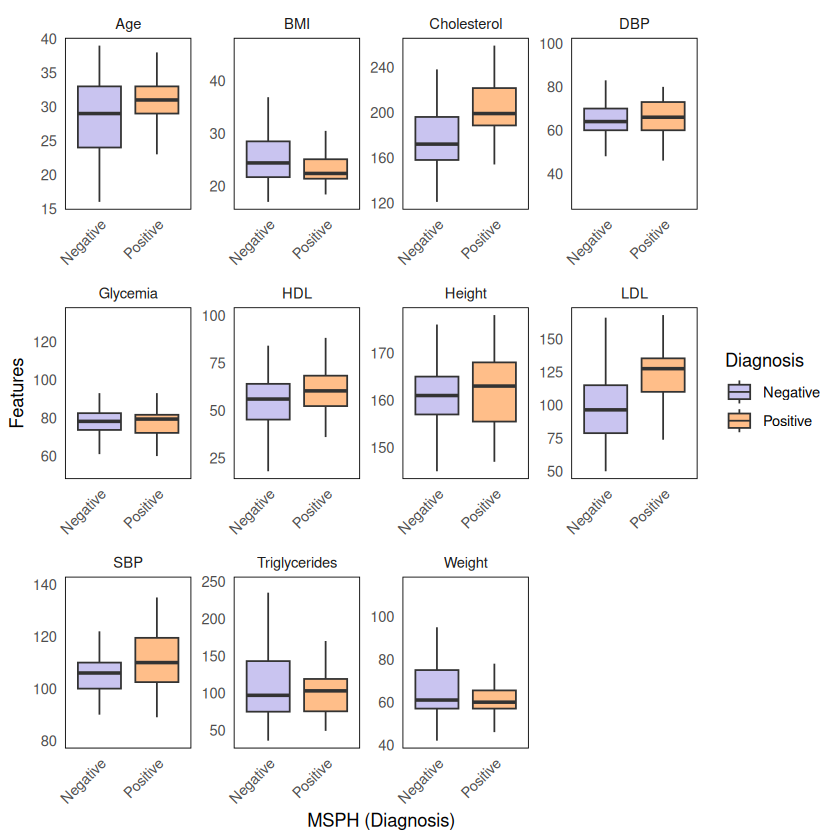

In [11]:
# Transformar el dataframe para un análisis más general
data_long <- pivot_longer(data, cols = -MSPH, names_to = "Variable", values_to = "Value")

# Crear boxplot con comparaciones estadísticas (solo significativas)
plot <- ggplot(data_long, aes(x = MSPH, y = Value, fill = MSPH)) +
  geom_boxplot(outlier.shape = NA) +
  facet_wrap(~ Variable, scales = "free") +
  scale_fill_manual(values = c("Negative" = "#C9C4F0", "Positive" = "#FFBE89")) +
  labs(x = "MSPH (Diagnosis)",
       y = "Features",
       fill = "Diagnosis") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid = element_blank(),
        panel.background = element_rect(fill = "white")) +
  stat_compare_means(aes(group = MSPH), 
                     method = "t.test", 
                     label = "p.signif", 
                     hide.ns = TRUE) # Ocultar "ns"

# Mostrar el plot
print(plot)

# Exportar el plot como un archivo de imagen
ggsave("boxplot_MSPH_significant_pvalues.png", plot, width = 12, height = 8)


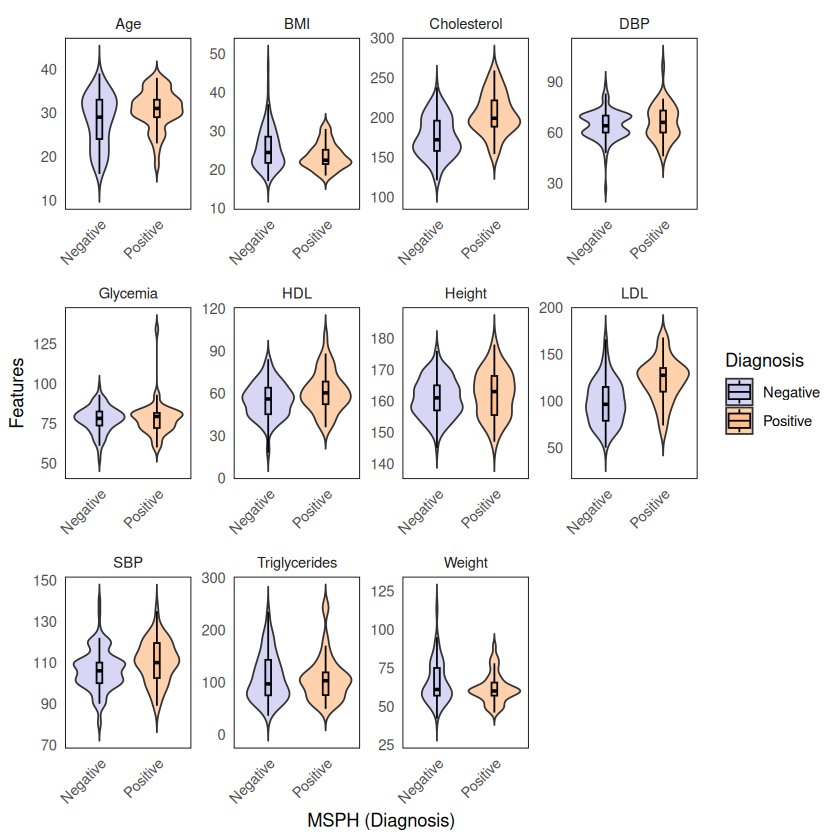

In [12]:
# Transformar el dataframe para un análisis más general
data_long <- pivot_longer(data, cols = -MSPH, names_to = "Variable", values_to = "Value")

# Crear violin plot con boxplots superpuestos
plot <- ggplot(data_long, aes(x = MSPH, y = Value, fill = MSPH)) +
  geom_violin(trim = FALSE, alpha = 0.7) + # Violin plot para la distribución
  geom_boxplot(width = 0.1, outlier.shape = NA, color = "black") + # Boxplot superpuesto
  facet_wrap(~ Variable, scales = "free") + # Facetas por cada variable
  scale_fill_manual(values = c("Negative" = "#C9C4F0", "Positive" = "#FFBE89")) +
  labs(x = "MSPH (Diagnosis)",
       y = "Features",
       fill = "Diagnosis") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid = element_blank(),
        panel.background = element_rect(fill = "white"))

# Mostrar el plot
print(plot)

# Exportar el plot como un archivo de imagen
ggsave("violin_plot_MSPH.png", plot, width = 12, height = 8)

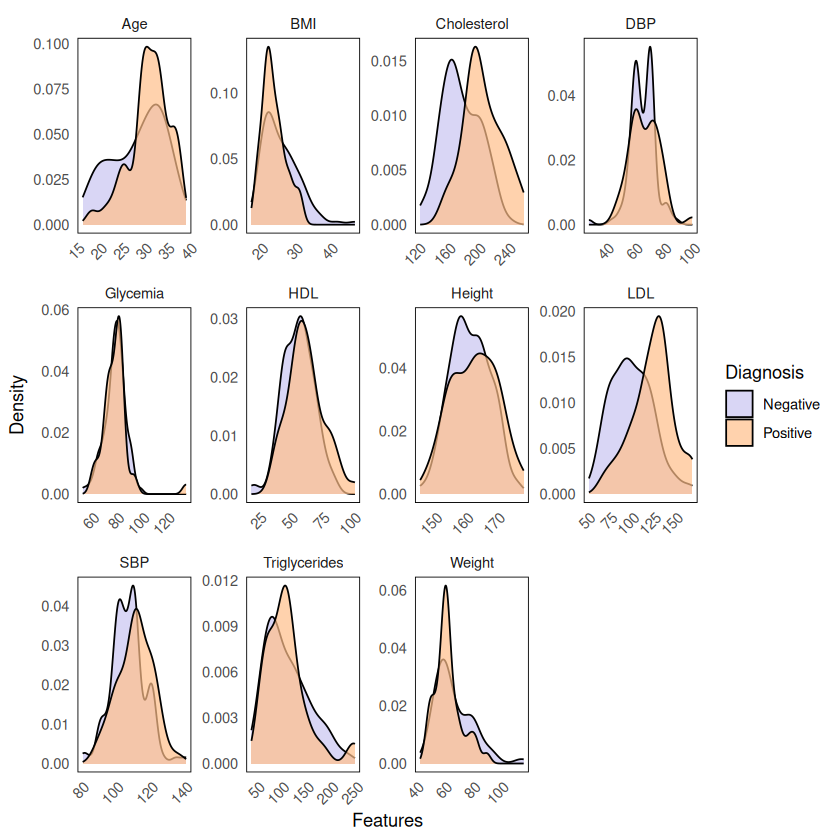

In [13]:
# Transformar el dataframe para un análisis más general
data_long <- pivot_longer(data, cols = -MSPH, names_to = "Variable", values_to = "Value")

# Crear gráficos de densidad
plot_density <- ggplot(data_long, aes(x = Value, fill = MSPH)) +
  geom_density(alpha = 0.7) + # Gráficos de densidad con transparencia
  facet_wrap(~ Variable, scales = "free") + # Facetas por cada variable
  scale_fill_manual(values = c("Negative" = "#C9C4F0", "Positive" = "#FFBE89")) +
  labs(x = "Features",
       y = "Density",
       fill = "Diagnosis") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid = element_blank(),
        panel.background = element_rect(fill = "white"))

# Mostrar el gráfico
print(plot_density)

# Exportar el gráfico como un archivo de imagen
ggsave("density_plot_MSPH.png", plot_density, width = 12, height = 8)

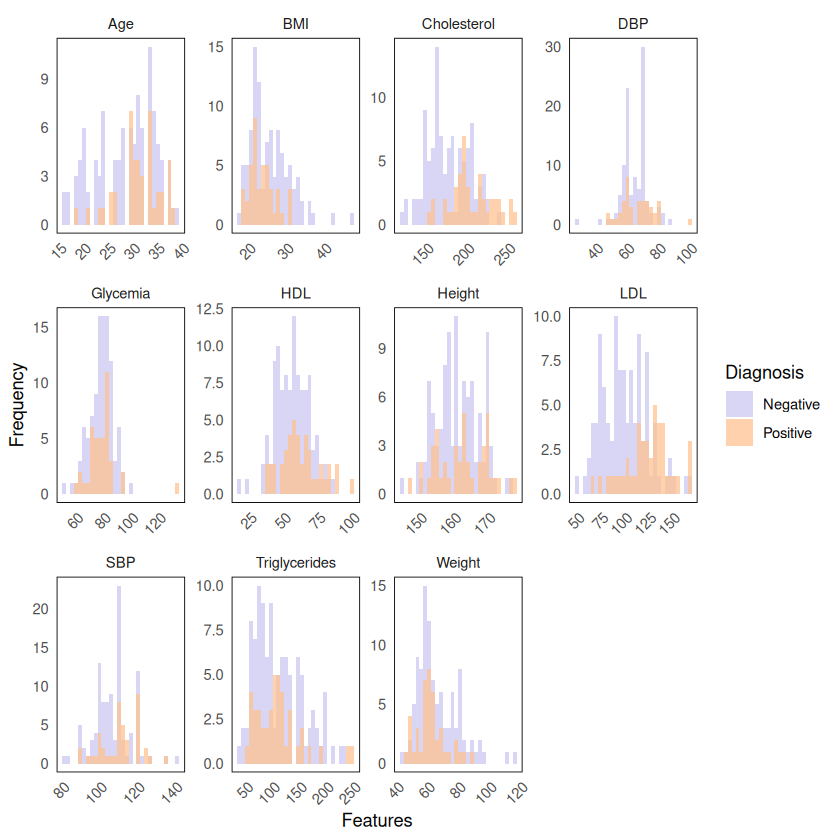

In [14]:
# Crear histogramas superpuestos
plot_histogram <- ggplot(data_long, aes(x = Value, fill = MSPH)) +
  geom_histogram(alpha = 0.7, position = "identity", bins = 30) + # Histogramas superpuestos
  facet_wrap(~ Variable, scales = "free") + # Facetas por cada variable
  scale_fill_manual(values = c("Negative" = "#C9C4F0", "Positive" = "#FFBE89")) +
  labs(x = "Features",
       y = "Frequency",
       fill = "Diagnosis") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid = element_blank(),
        panel.background = element_rect(fill = "white"))

# Mostrar el gráfico
print(plot_histogram)

# Exportar el gráfico como un archivo de imagen
ggsave("histogram_plot_MSPH.png", plot_histogram, width = 12, height = 8)

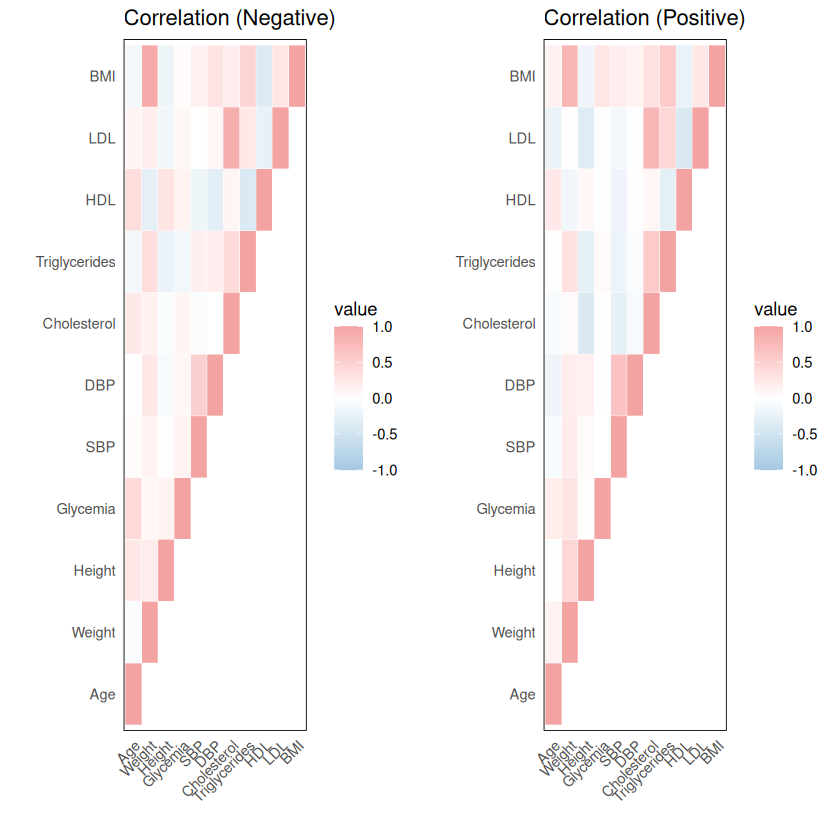

In [15]:

# Filtrar datos numéricos y separar por MSPH
numeric_columns <- sapply(data, is.numeric) # Identificar columnas numéricas
data_numeric <- data[, numeric_columns] # Conservar solo columnas numéricas
data_negative <- data_numeric[data$MSPH == "Negative", ]
data_positive <- data_numeric[data$MSPH == "Positive", ]

# Calcular matrices de correlación
cor_negative <- cor(data_negative, use = "complete.obs")
cor_positive <- cor(data_positive, use = "complete.obs")

# Convertir las matrices en formato largo para ggplot
melted_negative <- melt(cor_negative)
melted_positive <- melt(cor_positive)

# Filtrar sólo la diagonal superior para cada matriz
melted_negative <- melted_negative[as.integer(melted_negative$Var1) >= as.integer(melted_negative$Var2), ]
melted_positive <- melted_positive[as.integer(melted_positive$Var1) >= as.integer(melted_positive$Var2), ]

# Crear gráficos para cada matriz
plot_correlation_negative <- ggplot(melted_negative, aes(x = Var2, y = Var1, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "#A3C9E2", high = "#F4A3A3", mid = "white", midpoint = 0, limit = c(-1, 1)) +
  labs(title = "Correlation (Negative)", x = "", y = "") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid = element_blank(),
        panel.background = element_rect(fill = "white"))

plot_correlation_positive <- ggplot(melted_positive, aes(x = Var2, y = Var1, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "#A3C9E2", high = "#F4A3A3", mid = "white", midpoint = 0, limit = c(-1, 1)) +
  labs(title = "Correlation (Positive)", x = "", y = "") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid = element_blank(),
        panel.background = element_rect(fill = "white"))

# Combinar ambos gráficos en un único plot
combined_plot <- ggarrange(plot_correlation_negative, plot_correlation_positive, ncol = 2, nrow = 1)

# Mostrar el gráfico combinado
print(combined_plot)

# Exportar el gráfico como un archivo de imagen
ggsave("correlation_matrices_upper_diagonal_pastel.png", combined_plot, width = 14, height = 7)


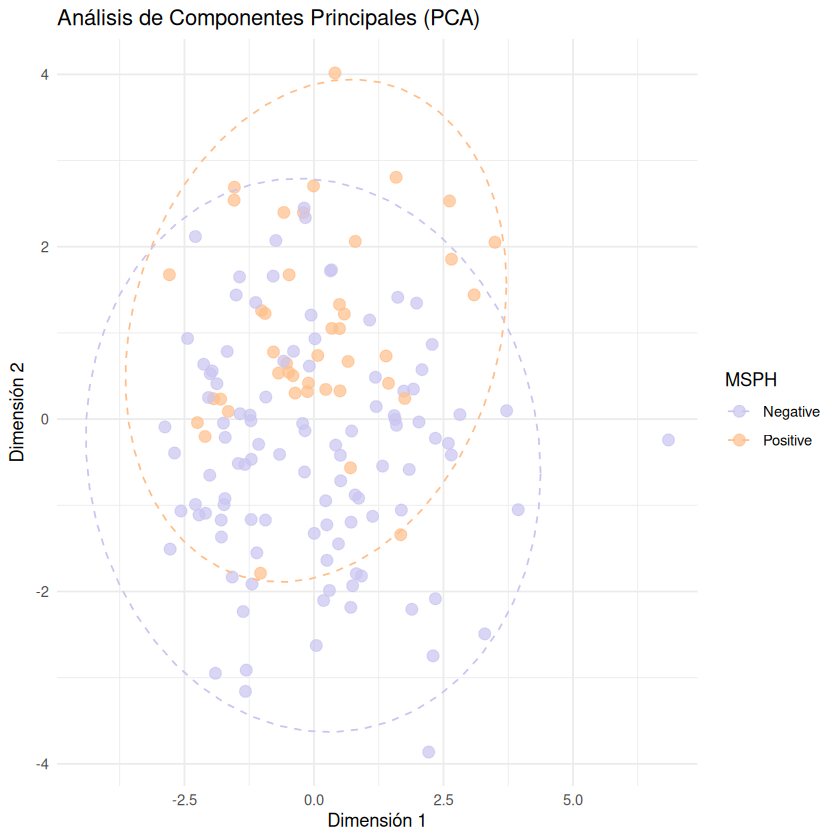

In [16]:
# Leer el dataset
data <- read.csv("../../results/processed_dataset/1_processed_input_dataset.csv")

# Reemplazar valores en MSPH
data$MSPH <- ifelse(data$MSPH == 0, "Negative", "Positive")

# Filtrar columnas numéricas y escalar los datos
numeric_columns <- sapply(data, is.numeric)
data_numeric <- scale(data[, numeric_columns])

# Realizar el PCA
pca_res <- PCA(data_numeric, graph = FALSE)

# Crear un dataframe con los resultados del PCA y agregar MSPH
pca_df <- data.frame(pca_res$ind$coord, MSPH = data$MSPH)

# Visualizar el PCA con los grupos de MSPH
pca_plot <- ggplot(pca_df, aes(x = Dim.1, y = Dim.2, color = MSPH)) +
  geom_point(size = 3, alpha = 0.7) +
  stat_ellipse(aes(group = MSPH), type = "norm", level = 0.95, linetype = 2) +
  scale_color_manual(values = c("Negative" = "#C9C4F0", "Positive" = "#FFBE89")) +
  labs(title = "Análisis de Componentes Principales (PCA)",
       x = "Dimensión 1",
       y = "Dimensión 2",
       color = "MSPH") +
  theme_minimal()

# Mostrar el gráfico del PCA
print(pca_plot)

# Exportar el gráfico
ggsave("pca_MSPH_final.png", pca_plot, width = 10, height = 7)

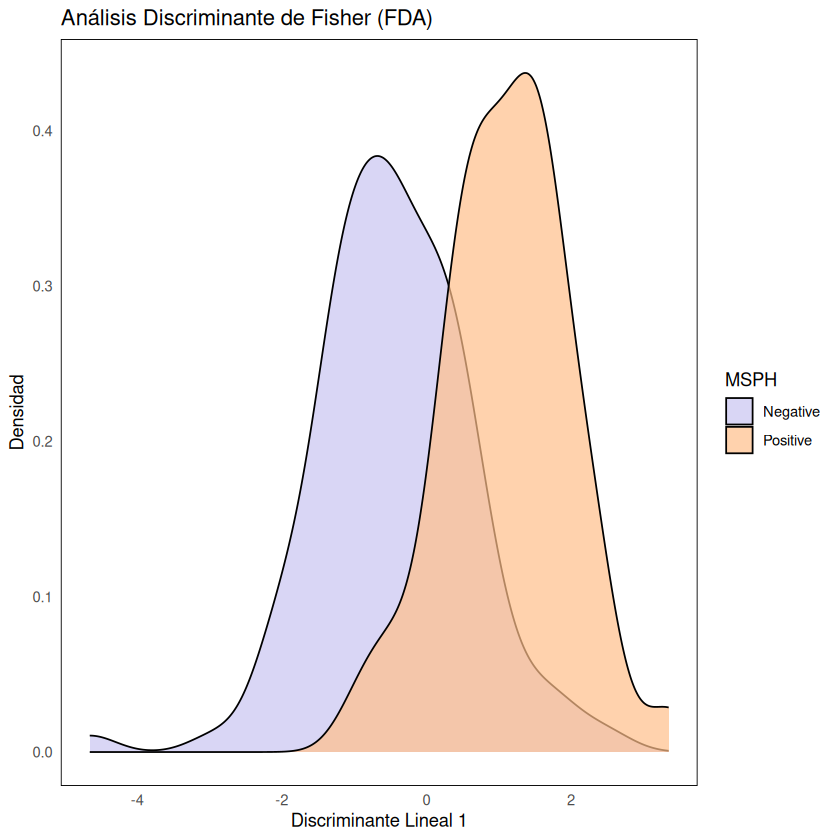

In [17]:
# Leer el dataset
data <- read.csv("../../results/processed_dataset/1_processed_input_dataset.csv")

# Reemplazar valores en MSPH
data$MSPH <- factor(ifelse(data$MSPH == 0, "Negative", "Positive"))

# Filtrar columnas numéricas
numeric_columns <- sapply(data, is.numeric)
data_numeric <- data[, numeric_columns]

# Incorporar la variable MSPH a los datos numéricos
fda_data <- cbind(data_numeric, MSPH = data$MSPH)

# Realizar el FDA
fda_model <- lda(MSPH ~ ., data = fda_data)

# Obtener las predicciones del modelo
fda_predictions <- predict(fda_model)

# Crear un dataframe para la visualización
fda_df <- data.frame(LD1 = fda_predictions$x[, 1], MSPH = data$MSPH)

# Verificar si existe LD2
if (ncol(fda_predictions$x) > 1) {
  fda_df$LD2 <- fda_predictions$x[, 2]
}

# Visualizar los resultados del FDA
if ("LD2" %in% colnames(fda_df)) {
  # Si existe LD2, se visualizan ambas dimensiones
  fda_plot <- ggplot(fda_df, aes(x = LD1, y = LD2, color = MSPH)) +
    geom_point(size = 3, alpha = 0.7) +
    scale_color_manual(values = c("Negative" = "#C9C4F0", "Positive" = "#FFBE89")) +
    labs(title = "Análisis Discriminante de Fisher (FDA)",
         x = "Discriminante Lineal 1",
         y = "Discriminante Lineal 2",
         color = "MSPH") +
    theme_minimal()
} else {
  # Si no existe LD2, se visualiza solo LD1
  fda_plot <- ggplot(fda_df, aes(x = LD1, fill = MSPH)) +
    geom_density(alpha = 0.7) +
    scale_fill_manual(values = c("Negative" = "#C9C4F0", "Positive" = "#FFBE89")) +
    labs(title = "Análisis Discriminante de Fisher (FDA)",
         x = "Discriminante Lineal 1",
         y = "Densidad",
         fill = "MSPH") +
    theme_minimal()+
    theme(panel.grid = element_blank(),
        panel.background = element_rect(fill = "white"))
}

# Mostrar el gráfico del FDA
print(fda_plot)

# Exportar el gráfico
ggsave("fda_MSPH.png", fda_plot, width = 10, height = 7)


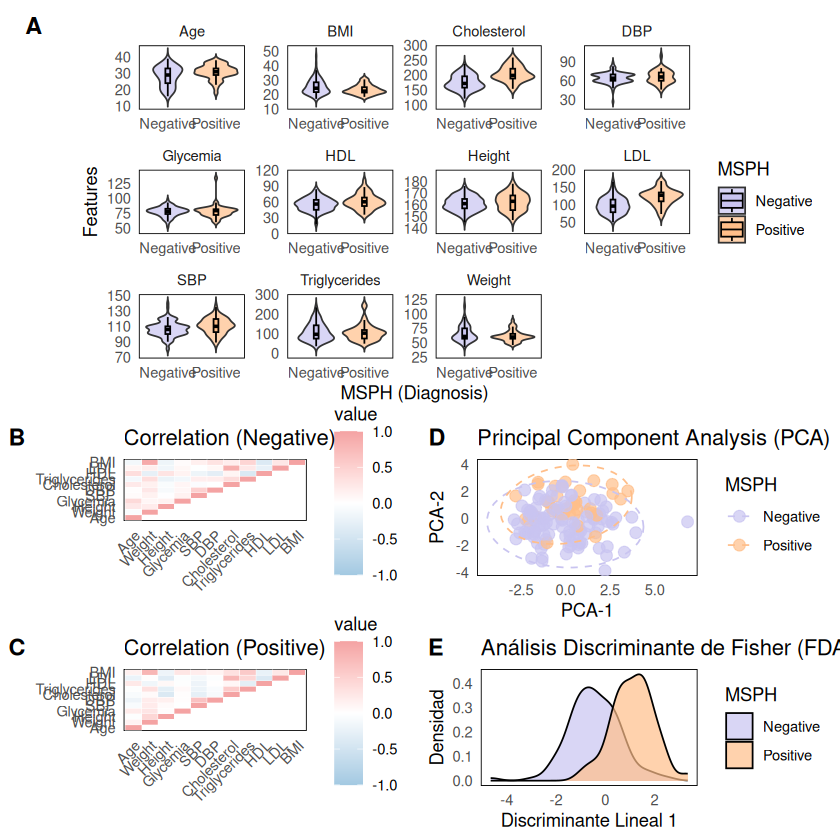

In [18]:
# Violin Plot (supongo que ya está generado como `plot_violin`)
plot_violin <- ggplot(data_long, aes(x = MSPH, y = Value, fill = MSPH)) +
  geom_violin(trim = FALSE, alpha = 0.7) +
  geom_boxplot(width = 0.1, outlier.shape = NA, color = "black") +
  facet_wrap(~ Variable, scales = "free") +
  scale_fill_manual(values = c("Negative" = "#C9C4F0", "Positive" = "#FFBE89")) +
  labs(x = "MSPH (Diagnosis)",
       y = "Features") +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        panel.background = element_rect(fill = "white"))

# Matrices de correlación (ya generadas como `plot_negative` y `plot_positive`)
plot_correlation_negative <- ggplot(melted_negative, aes(x = Var2, y = Var1, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "#A3C9E2", high = "#F4A3A3", mid = "white", midpoint = 0, limit = c(-1, 1)) +
  labs(title = "Correlation (Negative)", x = "", y = "") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid = element_blank(),
        panel.background = element_rect(fill = "white"))

plot_correlation_positive <- ggplot(melted_positive, aes(x = Var2, y = Var1, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "#A3C9E2", high = "#F4A3A3", mid = "white", midpoint = 0, limit = c(-1, 1)) +
  labs(title = "Correlation (Positive)", x = "", y = "") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid = element_blank(),
        panel.background = element_rect(fill = "white"))

# PCA Plot (ya generado como `pca_plot`)
pca_plot <- ggplot(pca_df, aes(x = Dim.1, y = Dim.2, color = MSPH)) +
  geom_point(size = 3, alpha = 0.7) +
  stat_ellipse(aes(group = MSPH), type = "norm", level = 0.95, linetype = 2) +
  scale_color_manual(values = c("Negative" = "#C9C4F0", "Positive" = "#FFBE89")) +
  labs(title = "Principal Component Analysis (PCA)",
       x = "PCA-1",
       y = "PCA-2",
       color = "MSPH") +
  theme_minimal() +
    theme(panel.grid = element_blank(),
        panel.background = element_rect(fill = "white"))

# FDA Plot (ya generado como `fda_plot`)
fda_plot <- fda_plot # Si ya se ejecutó el código previo, `fda_plot` está disponible

# Añadir la etiqueta explícita a la esquina superior izquierda del Violin Plot
plot_violin_labeled <- ggarrange(
  plot_violin + theme(plot.margin = margin(10, 10, 10, 50)), # Espacio para la etiqueta
  labels = "A", label.x = 0.02, label.y = 0.98, # Colocar la etiqueta en la esquina superior izquierda
  font.label = list(size = 14, face = "bold"),
  ncol = 1, nrow = 1
)

# Combinar los gráficos en subpaneles con la disposición solicitada
combined_plot <- ggarrange(
  # Primera fila: Violin Plot etiquetado
  plot_violin_labeled, 
  # Segunda fila: Matriz de correlación (Negative) y PCA
  ggarrange(
    plot_correlation_negative, pca_plot, 
    ncol = 2, labels = c("B", "D"), widths = c(1, 1)
  ),
  # Tercera fila: Matriz de correlación (Positive) y FDA
  ggarrange(
    plot_correlation_positive, fda_plot, 
    ncol = 2, labels = c("C", "E"), widths = c(1, 1)
  ),
  # Configuración general
  ncol = 1, nrow = 3, heights = c(2, 1, 1)
)

# Mostrar el gráfico combinado
print(combined_plot)

# Exportar el gráfico combinado
ggsave("general_analysis_figure_adjusted.png", combined_plot, width = 12, height = 18)
